# Bank Loan Eligibility App - Machine Learning with Python

![](https://imgur.com/SBFVsG3.jpg)

## Problem Statement

Majority of these customers are liability customers (depositors) with varying size of deposits.
The number of customers who are also borrowers (asset customers) is quite small, 
and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. 
In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). 

The department wants us to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of a campaign.

### How to Approach a Machine Learning Problem

Here's a strategy we would apply to approach any machine learning problem:

1. Explore the data and find correlations between inputs and targets
2. Pick the right model, loss functions and optimizer for the problem at hand
3. Scale numeric variables and one-hot encode categorical data
4. Set aside a test set (using a fraction of the training set)
5. Train the model
6. Make predictions on the test set and compute the loss

Column Description 
* ID: Customer ID
* Age: Customer's age in completed years
* Experience: years of professional experience
* Income: Annual income of the customer
* ZIPCode: Home Address ZIP code
*  Family: Family size of the customer
*  CCAvg: Avg spending on credit cards per month
*  Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
*  Mortgage: Value of house mortgage if any
*  Personal Loan: Did this customer accept the personal loan offered in the last campaign?
*  Securities: Account Does the customer have a securities account with the bank?
*  CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
*  Online: Does the customer use internet banking facilities?
*  CreditCard: Does the customer use a credit card issued by UniversalBank?

In [1]:
#Here we install the packages needed to download a dataset

!pip install opendatasets --upgrade --quiet

In [2]:
#Now we want to import the packages to be used in our python script. Opendataset is aliased as 'od'

import opendatasets as od

In [3]:
#Here we download the dataset that is required.

od.download('https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling')

Skipping, found downloaded files in ".\bank-loan-modelling" (use force=True to force download)


In [4]:
#Importing os helps to identify what is in the file through the operating system.

import os

In [5]:
#Here we create a folder where we can address the dataset

bank_loan = './bank-loan-modelling'

In [6]:
#We confirm the dataset is in the directory having assigned it to a variable bank_loan

os.listdir(bank_loan)

['Bank_Personal_Loan_Modelling.xlsx', '~$Bank_Personal_Loan_Modelling.xlsx']

In [7]:
#Installing of pandas package and others packages to use panda library, read an excel file respectively

!pip install pandas --quiet
!pip install openpyxl --quiet
!pip install nbformat --quiet
!pip install statsmodels --quiet


In [8]:
#Importing of pandas library to make use of its packages

import pandas as pd

In [9]:
#Reading the datafile in excel format. Also, the excel file has two worksheets. The data to be worked on is in the second sheet, hence I needed to specify the sheet name.

bankdata_df = pd.read_excel('./bank-loan-modelling/Bank_Personal_Loan_Modelling.xlsx', sheet_name = 'Data')

In [10]:
#Viewing of the dataframe
bankdata_df

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [11]:
#Checking the information of the dataframe.

bankdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [12]:
#Check for null values
bankdata_df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

This means there are no empty rows

In [13]:
# Description of the dataset
bankdata_df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937913     1.881000    56.498800       0.096000   
std       1.147663     1.747666     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [14]:
# To check for duplicates
bankdata_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [15]:
#Check for negative values
bankdata_df.query('Experience < 0')

ID  Age  Experience  Income  ZIP Code  Family     CCAvg  Education  \
89      90   25          -1     113     94303       4  2.300000          3   
226    227   24          -1      39     94085       2  1.700000          2   
315    316   24          -2      51     90630       3  0.300000          3   
451    452   28          -2      48     94132       2  1.750000          3   
524    525   24          -1      75     93014       4  0.200000          1   
536    537   25          -1      43     92173       3  2.400000          2   
540    541   25          -1     109     94010       4  2.300000          3   
576    577   25          -1      48     92870       3  0.300000          3   
583    584   24          -1      38     95045       2  1.700000          2   
597    598   24          -2     125     92835       2  7.200000          1   
649    650   25          -1      82     92677       4  2.100000          3   
670    671   23          -1      61     92374       4  2.600000          1   
686    687   24          -1      38     92612       4  0.600000          2   
793    794   24          -2     150     94720       2  2.000000          1   
889    890   24          -2      82     91103       2  1.600000          3   
909    910   23          -1     149     91709       1  6.333333          1   
1173  1174   24          -1      35     94305       2  1.700000          2   
1428  1429   25          -1      21     94583       4  0.400000          1   
1522  1523   25          -1     101     94720       4  2.300000          3   
1905  1906   25          -1     112     92507       2  2.000000          1   
2102  2103   25          -1      81     92647       2  1.600000          3   
2430  2431   23          -1      73     92120       4  2.600000          1   
2466  2467   24          -2      80     94105       2  1.600000          3   
2545  2546   25          -1      39     94720       3  2.400000          2   
2618  2619   23          -3      55     92704       3  2.400000          2   
2717  2718   23          -2      45     95422       4  0.600000          2   
2848  2849   24          -1      78     94720       2  1.800000          2   
2876  2877   24          -2      80     91107       2  1.600000          3   
2962  2963   23          -2      81     91711       2  1.800000          2   
2980  2981   25          -1      53     94305       3  2.400000          2   
3076  3077   29          -1      62     92672       2  1.750000          3   
3130  3131   23          -2      82     92152       2  1.800000          2   
3157  3158   23          -1      13     94720       4  1.000000          1   
3279  3280   26          -1      44     94901       1  2.000000          2   
3284  3285   25          -1     101     95819       4  2.100000          3   
3292  3293   25          -1      13     95616       4  0.400000          1   
3394  3395   25          -1     113     90089       4  2.100000          3   
3425  3426   23          -1      12     91605       4  1.000000          1   
3626  3627   24          -3      28     90089       4  1.000000          3   
3796  3797   24          -2      50     94920       3  2.400000          2   
3824  3825   23          -1      12     95064       4  1.000000          1   
3887  3888   24          -2     118     92634       2  7.200000          1   
3946  3947   25          -1      40     93117       3  2.400000          2   
4015  4016   25          -1     139     93106       2  2.000000          1   
4088  4089   29          -1      71     94801       2  1.750000          3   
4116  4117   24          -2     135     90065       2  7.200000          1   
4285  4286   23          -3     149     93555       2  7.200000          1   
4411  4412   23          -2      75     90291       2  1.800000          2   
4481  4482   25          -2      35     95045       4  1.000000          3   
4514  4515   24          -3      41     91768       4  1.000000          3   
4582  4583   25          -1   

## Visualization
Distribution of the dataset

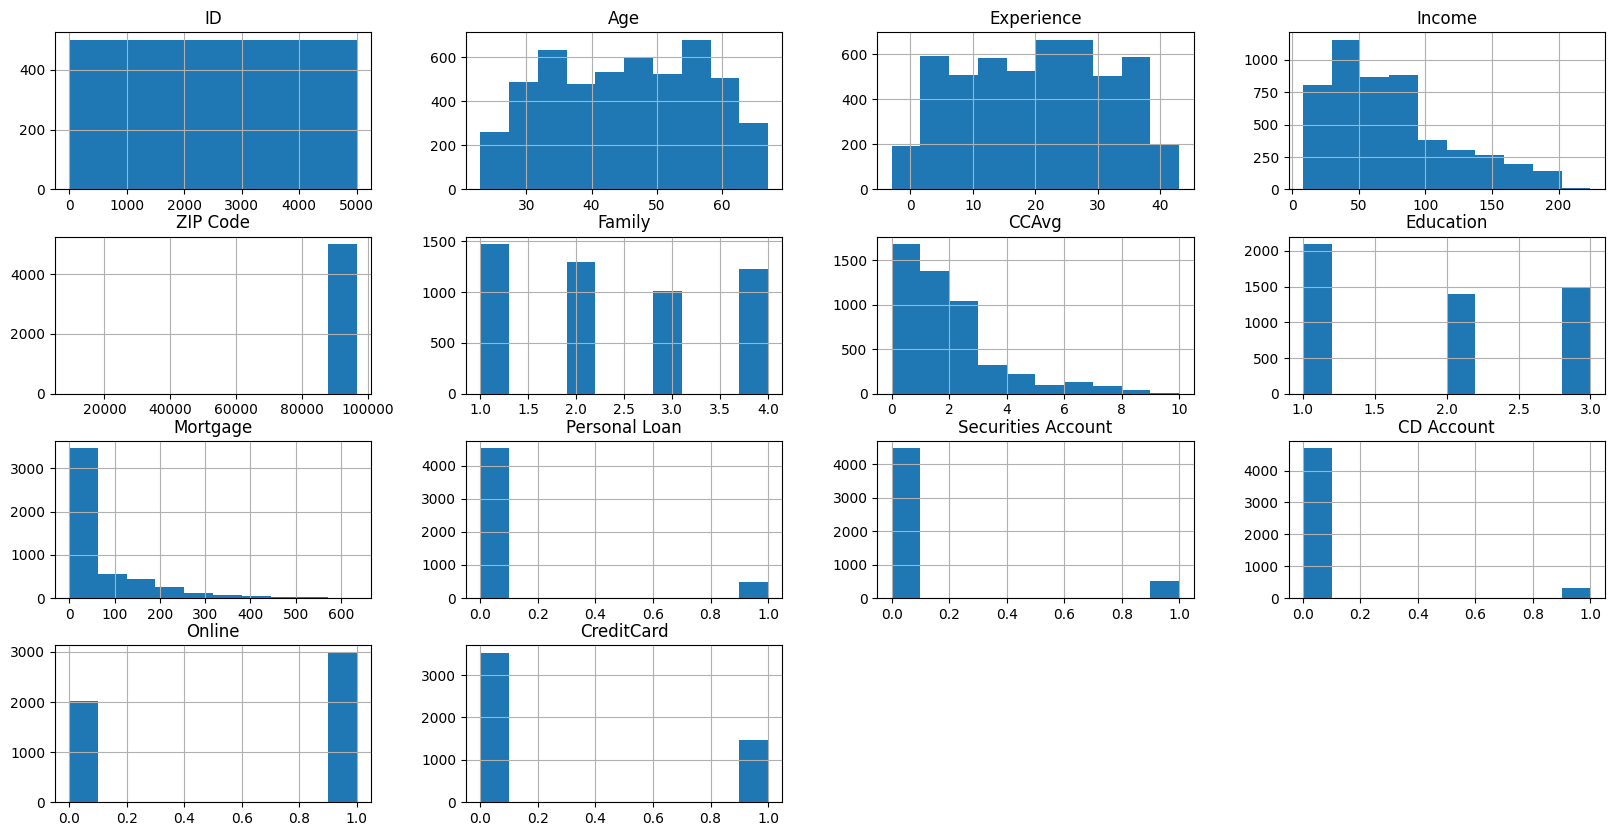

In [16]:
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import seaborn as sns
import numpy as np
import pandas as pd
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


# We plot a histogram for all the individual columns against the total population to find the distribution of the dataset
plt.rcParams["figure.figsize"] = (20,10)
bankdata_df.hist();

## Deductions
* majority fall between ages of 35 - 45 & 55 - 60
* Majority of the experience is between 20 - 30 years
* majority of income falls between 35 - 50k
* family size majority is 1 and 2
* credit card spending average majoriy between 0 to 2k a month
* customers majorly are undergraduate--thats why their spending is not so much
* mortagage between 0-50k for majority
* majority did not accept bank's personal loan -- this is expected because of low mortagage and a low cc spending
* majority of customers are not having securities accounts nor cd accounts
* usage of online banking is high 
* credit cards issued are not used so much


Detecting Outliers

In [17]:
px.box(bankdata_df.drop(['ID','ZIP Code'],axis=1)).show()

[ Income , CCAvg , Mortgage ] columns Have Outliers

Check Outliers For Income Column

In [18]:
i='Income'

Q1 = bankdata_df[i].quantile(0.25)
Q3 = bankdata_df[i].quantile(0.75)
IQR = Q3 - Q1          
outliers =bankdata_df[(bankdata_df[i] < (Q1 - 1.5 * IQR)) | (bankdata_df[i] > (Q3 + 1.5 * IQR))]
print(i,'outliers Count:',outliers.shape[0])

outliers

Income outliers Count: 96


ID  Age  Experience  Income  ZIP Code  Family     CCAvg  Education  \
18      19   46          21     193     91604       2  8.100000          3   
47      48   37          12     194     91380       4  0.200000          3   
53      54   50          26     190     90245       3  2.100000          3   
59      60   31           5     188     91320       2  4.500000          1   
303    304   49          25     195     95605       4  3.000000          1   
...    ...  ...         ...     ...       ...     ...       ...        ...   
4659  4660   28           4     199     92121       1  6.333333          1   
4670  4671   52          26     194     94305       1  1.700000          1   
4895  4896   45          20     201     92120       2  2.800000          1   
4981  4982   34           9     195     90266       2  3.000000          1   
4993  4994   45          21     218     91801       2  6.666667          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
18           0              1                   0           0       0   
47         211              1                   1           1       1   
53         240              1                   0           0       1   
59         455              0                   0           0       0   
303        617              1                   0           0       0   
...        ...            ...                 ...         ...     ...   
4659         0              0                   0           0       0   
4670         0              0                   0           0       1   
4895         0              0                   0           0       1   
4981       122              0                   0           0       1   
4993         0              0                   0           0       1   

      CreditCard  
18             0  
47             1  
53             0  
59             0  
303            0  
...          ...  
4659           0  
4670           0  
4895           1  
4981           0  
4993           0  

[96 rows x 14 columns]

In [19]:
# distribution of the income in the main dataframe
px.scatter(bankdata_df,x='Income',trendline="ols")

In [57]:
# distribution of the income in the outlier dataframe
px.scatter(outliers,x='Income',trendline="ols")

We would delete Outliers of index 3896, 4993 Form Income Column

Check Outliers For CCAvg Column

In [21]:
i = 'CCAvg'

Q1 = bankdata_df[i].quantile(0.25)
Q3 = bankdata_df[i].quantile(0.75)
IQR = Q3 - Q1          
outliers =bankdata_df[(bankdata_df[i] < (Q1 - 1.5 * IQR)) | (bankdata_df[i] > (Q3 + 1.5 * IQR))]
print(i,'outliers Count:',outliers.shape[0])

outliers

CCAvg outliers Count: 324


ID  Age  Experience  Income  ZIP Code  Family     CCAvg  Education  \
9       10   34           9     180     93023       1  8.900000          3   
18      19   46          21     193     91604       2  8.100000          3   
44      45   46          20     104     94065       1  5.700000          1   
55      56   41          17     139     94022       2  8.000000          1   
61      62   47          21     125     93407       1  5.700000          1   
...    ...  ...         ...     ...       ...     ...       ...        ...   
4908  4909   40          16     138     92121       2  6.100000          1   
4911  4912   46          22     153     94539       2  7.500000          1   
4937  4938   33           8     162     94960       1  8.600000          1   
4980  4981   29           5     135     95762       3  5.300000          1   
4993  4994   45          21     218     91801       2  6.666667          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
9            0              1                   0           0       0   
18           0              1                   0           0       0   
44           0              0                   0           0       1   
55           0              0                   0           0       1   
61         112              0                   1           0       0   
...        ...            ...                 ...         ...     ...   
4908         0              0                   0           0       1   
4911         0              0                   0           0       0   
4937         0              0                   0           1       1   
4980         0              1                   0           1       1   
4993         0              0                   0           0       1   

      CreditCard  
9              0  
18             0  
44             1  
55             0  
61             0  
...          ...  
4908           0  
4911           0  
4937           1  
4980           1  
4993           0  

[324 rows x 14 columns]

In [22]:
# distribution of the CCAvg in the main dataframe
px.scatter(bankdata_df,x='CCAvg',trendline="ols")

In [23]:
# distribution of the CCAvg in the outliers dataframe
px.scatter(outliers,x='CCAvg',trendline="ols")

No Need To Delete Outliers Form CCAvg Column

Check Outliers For Mortgage Column

In [24]:
i='Mortgage'

Q1 = bankdata_df[i].quantile(0.25)
Q3 = bankdata_df[i].quantile(0.75)
IQR = Q3 - Q1          
outliers =bankdata_df[(bankdata_df[i] < (Q1 - 1.5 * IQR)) | (bankdata_df[i] > (Q3 + 1.5 * IQR))]
print(i,'outliers Count:',outliers.shape[0])

outliers

Mortgage outliers Count: 291


ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
22      23   29           5      62     90277       1    1.2          1   
39      40   38          13      80     94115       4    0.7          3   
42      43   32           7     132     90019       4    1.1          2   
59      60   31           5     188     91320       2    4.5          1   
66      67   62          36     105     95670       2    2.8          1   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4859  4860   34           8     165     91107       1    7.0          3   
4865  4866   50          24     133     90025       4    1.4          2   
4899  4900   54          29      85     94928       4    1.3          3   
4942  4943   52          26     109     94710       1    2.4          1   
4963  4964   32           6      98     95054       2    4.5          3   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
22         260              0                   0           0       1   
39         285              0                   0           0       1   
42         412              1                   0           0       1   
59         455              0                   0           0       0   
66         336              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4859       541              1                   0           0       0   
4865       342              1                   0           0       0   
4899       299              0                   0           0       1   
4942       308              0                   0           1       1   
4963       306              0                   0           0       0   

      CreditCard  
22             0  
39             0  
42             0  
59             0  
66             0  
...          ...  
4859           0  
4865           1  
4899           0  
4942           1  
4963           0  

[291 rows x 14 columns]

In [25]:
# distribution of the Mortgage in the main dataframe
px.scatter(bankdata_df,x='Mortgage',trendline="ols")

In [26]:
# distribution of the Mortgage in the outliers dataframe
px.scatter(outliers,x='Mortgage',trendline="ols")

No Need To Delete Outliers Form Mortgage Column

## Data Cleaning

In [27]:
# Convert All The Negative Values To Positive At Experience Column

bankdata_df['Experience']=bankdata_df['Experience'].apply(lambda x :abs(x))

In [28]:
# Drop Unused columns
bankdata_df.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [29]:
# Delete the outliers

bankdata_df.drop(labels=[3896, 4993],axis=0,inplace=True)

## Data Final Look

In [30]:
bankdata_df.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [31]:
bankdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4998 non-null   int64  
 1   Experience          4998 non-null   int64  
 2   Income              4998 non-null   int64  
 3   Family              4998 non-null   int64  
 4   CCAvg               4998 non-null   float64
 5   Education           4998 non-null   int64  
 6   Mortgage            4998 non-null   int64  
 7   Personal Loan       4998 non-null   int64  
 8   Securities Account  4998 non-null   int64  
 9   CD Account          4998 non-null   int64  
 10  Online              4998 non-null   int64  
 11  CreditCard          4998 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 507.6 KB


In [32]:
bankdata_df.describe().transpose()

count       mean         std   min   25%   50%    75%  \
Age                 4998.0  45.337935   11.465397  23.0  35.0  45.0   55.0   
Experience          4998.0  20.133653   11.417336   0.0  10.0  20.0   30.0   
Income              4998.0  73.715286   45.948557   8.0  39.0  64.0   98.0   
Family              4998.0   2.396559    1.147865   1.0   1.0   2.0    3.0   
CCAvg               4998.0   1.936021    1.745453   0.0   0.7   1.5    2.5   
Education           4998.0   1.881353    0.839852   1.0   1.0   2.0    3.0   
Mortgage            4998.0  56.521409  101.727873   0.0   0.0   0.0  101.0   
Personal Loan       4998.0   0.096038    0.294673   0.0   0.0   0.0    0.0   
Securities Account  4998.0   0.104442    0.305863   0.0   0.0   0.0    0.0   
CD Account          4998.0   0.060224    0.237925   0.0   0.0   0.0    0.0   
Online              4998.0   0.596639    0.490621   0.0   0.0   1.0    1.0   
CreditCard          4998.0   0.293918    0.455600   0.0   0.0   0.0    1.0   

                      max  
Age                  67.0  
Experience           43.0  
Income              205.0  
Family                4.0  
CCAvg                10.0  
Education             3.0  
Mortgage            635.0  
Personal Loan         1.0  
Securities Account    1.0  
CD Account            1.0  
Online                1.0  
CreditCard            1.0

In [33]:
bankdata_df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## Exploratory Data Analysis

Co-relation Martex View

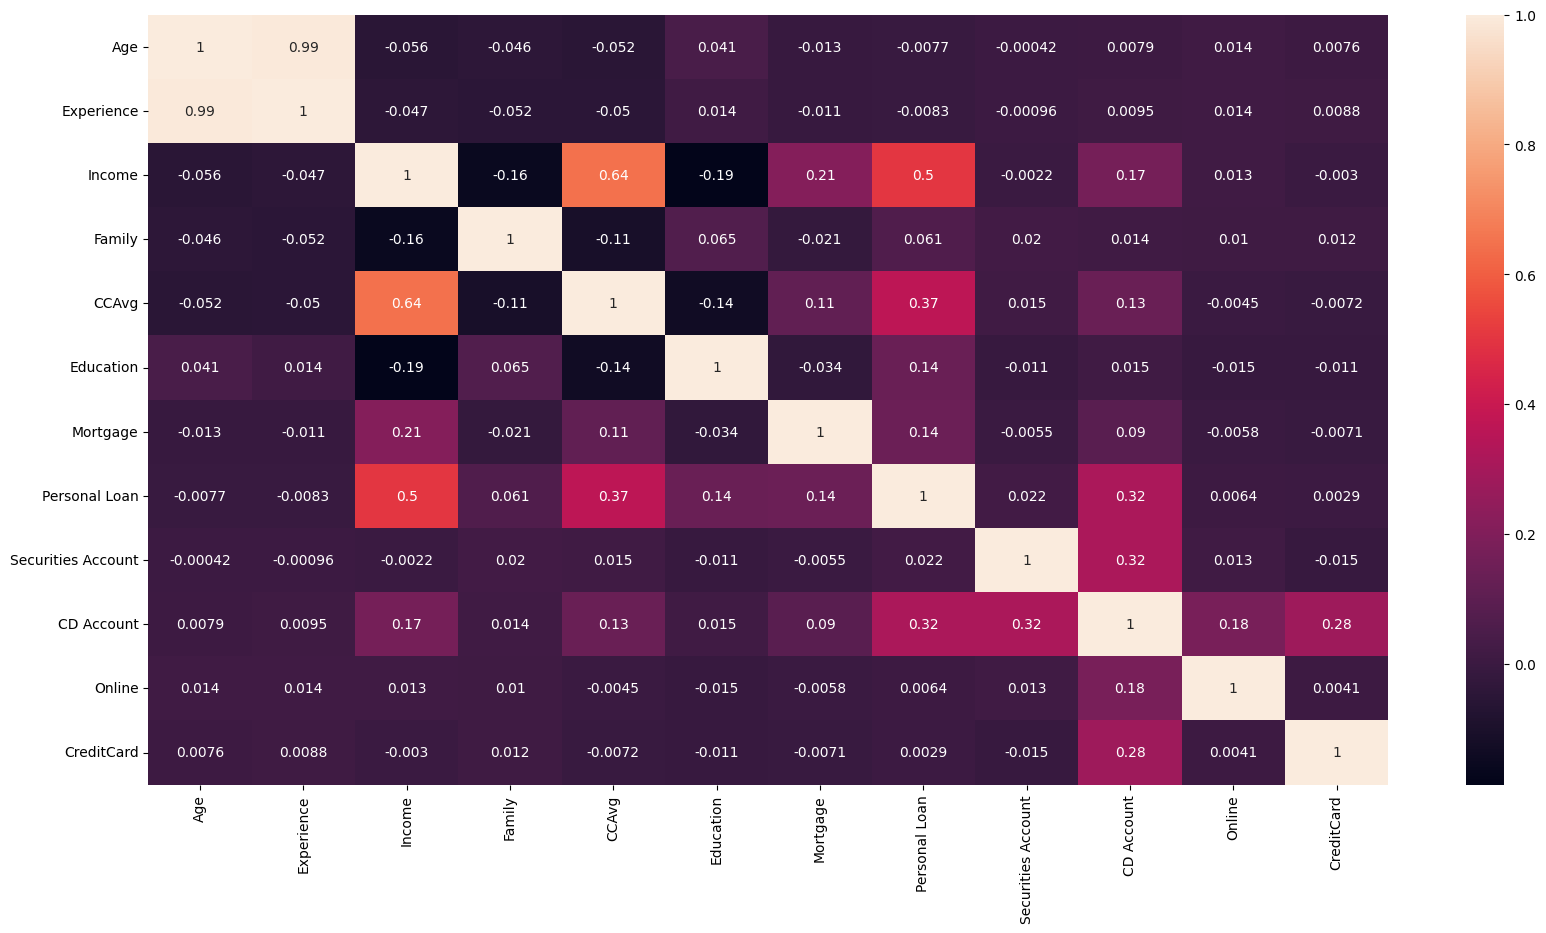

In [34]:
# See the power of relation between columns

corrMatrix = bankdata_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### From the matrix, we can see some columns affect the personal loan like:
* Income " 0.5 "
* CCAvg " 0.37 "
* CD Account " 0.32 "

In [35]:
%%HTML
<div class='tableauPlaceholder' id='viz1659791234848' style='position: relative'><noscript><a href='#'><img alt='How Does Income Affect  Personal Loan ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;in&#47;incloan&#47;v1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='incloan&#47;v1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;in&#47;incloan&#47;v1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1659791234848');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Here it is showen that the income has an effect on if the person will take a loan or not

In [36]:
%%HTML
<div class='tableauPlaceholder' id='viz1659790810964' style='position: relative'><noscript><a href='#'><img alt='How Does Avg Spend on Credit Affect The Personal Loan ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;cc&#47;ccavgperloan&#47;v2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='ccavgperloan&#47;v2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;cc&#47;ccavgperloan&#47;v2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1659790810964');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';vizElement.parentNode.insertBefore(scriptElement, vizElement);</script>

Here it is shown that the Avg Spend on Credit Effect has little effect on if the person will take a loan or not

In [37]:
CD_loan = bankdata_df.groupby('CD Account',as_index=False)['Personal Loan'].mean()
px.pie(CD_loan,names=['Don\'t Have','Have'],values='Personal Loan',title='The effect of certificates of deposit')

Here it is shown that the people who have certificates of deposit take loans more than the people who haven't

In [38]:
Edu_inc= bankdata_df.groupby('Education',as_index=False)['Income'].mean()
px.pie(Edu_inc,names=['Un-Degree','Graduated','Professional'],values='Income',title='Education effect on Income')

The Education level has little effect on the Chance to get a personal loan, but seems like the professional people have more income

In [39]:

%%HTML
<div class='tableauPlaceholder' id='viz1659792125158' style='position: relative'><noscript><a href='#'><img alt='The Proportion of Taking Loan For Each Age and Education Level ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;tp&#47;tpotlfeaael&#47;v6&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='tpotlfeaael&#47;v6' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;tp&#47;tpotlfeaael&#47;v6&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1659792125158');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Here it is shown that:
* Ages of 25, [32 to 36], [63 to 65] pose more chances to get loans
* Professional degree owners are more likely to get a Personal Loan
* Family Size has little effect but a family size 3 is more likely to get a Personal Loan

## Training of the model using DecisionTreeClassifier

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


In [41]:
#Seperating Target variable: X is data while y is target
X = bankdata_df.drop('Personal Loan', axis=1)
y = bankdata_df['Personal Loan']

In [42]:
#Splitting dataset into Test and train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state=1000)

In [43]:
#Function to perform training with entropy - hyperparameter tuning
clf_entropy = DecisionTreeClassifier(criterion= 'entropy',random_state= 1000, max_depth= 5, min_samples_leaf= 5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=1000)

## PREDICTION

In [44]:
#Function to make Predictions
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

## Accuracy Checking

In [45]:
accuracy = accuracy_score(y_test,y_pred_en)*100

In [46]:
# Checking Accuracy of test model.
print('Accuracy is: ', accuracy_score(y_test,y_pred_en)*100)

Accuracy is:  98.2


Report for DecisionTreeClassifier

In [47]:
from sklearn.metrics import classification_report

report_decTree = classification_report(y_test,y_pred_en)
print('Classification report: ', report_decTree)

Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99      1364
           1       0.90      0.90      0.90       136

    accuracy                           0.98      1500
   macro avg       0.94      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



## Applying logistic Regression classifier

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Function to perform logistic regression modelling
log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)
log_predict = log_regression.predict(X_test)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [49]:
#Calculating accuracy metrics
print('Accuracy for training set: ', metrics.accuracy_score(y_test,log_predict)*100)

Accuracy for training set:  93.73333333333333


In [50]:
# Classification report
report_logRegr = classification_report(y_test,log_predict)
print('Classification report: ', report_logRegr)

Classification report:                precision    recall  f1-score   support

           0       0.96      0.97      0.97      1364
           1       0.69      0.57      0.62       136

    accuracy                           0.94      1500
   macro avg       0.82      0.77      0.79      1500
weighted avg       0.93      0.94      0.93      1500



## Applying Random Forest classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

ran_clas = RandomForestClassifier(n_estimators = 50)
ran_clas.fit(X_train,y_train)
ran_predict = ran_clas.predict(X_test)
ran_predict

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [52]:
print('Accuracy for training set: ', metrics.accuracy_score(y_test,ran_predict)*100)

Accuracy for training set:  98.46666666666667


In [53]:
# Classification report
report_ranFor = classification_report(y_test,ran_predict)
print('Classification report: ', report_ranFor)

Classification report:                precision    recall  f1-score   support

           0       0.99      1.00      0.99      1364
           1       0.97      0.86      0.91       136

    accuracy                           0.98      1500
   macro avg       0.98      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500



Randomforest classification method has the highest accuracy model with 98.5%

In [54]:
# We save the model to be applied anywhere
# We install the joblib package
!pip install joblib --quiet

In [55]:
# Import joblib: 
# jump - save while 
# load - read
import joblib
from joblib import dump,load 

In [56]:
# Saving the model file into the required extension folder
joblib.dump(ran_clas, 'ran_clas.joblib')

['ran_clas.joblib']

In [60]:
#finding out the logistic summary of our model
import statsmodels.api as sm
from scipy import stats

In [61]:
#finding out the theoretical and true odd ratios of the individual coefficients
logit=sm.Logit(y,X)
result=logit.fit()
#print(np.exp(result.params))
#params= result.params
#conf=result.conf_int()
#conf["OR"]=params
#conf.columns=["2.5%","97.5%","OR"]
#print(np.exp(conf))
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.133344
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 4998
Model:                          Logit   Df Residuals:                     4987
Method:                           MLE   Df Model:                           10
Date:                Sat, 21 Jan 2023   Pseudo R-squ.:                  0.5784
Time:                        10:32:42   Log-Likelihood:                -666.45
converged:                       True   LL-Null:                       -1580.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.5090      0.022    -22.951      0.000      -0.552      -0.465
Exper

## Summary

* We can see some columns affect the personal loan like:

* Income " 0.5 "
* CCAvg " 0.37 
* CD Account " 0.32 "
* The income has an effect on if the person will take a loan or not, so the higher income the higher chance to have loan

* The Average Spend on Credit effect has not much effect on if the person will take a loan or not but seems that if the person has higher average may have higher chance to get a loan

* The people who have certificates of deposit takes loan more than the people who haven't

* The Education level doesn't affect too much at the Chance to have personal loan, but seems like the professional people has more income

* Ages of 25, [32 to 36], [63 to 65] have more chance to get loan

* professional degree owners are more likely to have Personal Loan

* Family Size Doesn't affect too much but the family size 3 is more likely to have Personal Loan

## Conclusion

We should to target the client with:
* higher income
* higher Average Spend on Credit
* certificates of deposit
* professional education level
* Ages of 25, [32 to 36], [63 to 65]
* Family Size of 3

to have the highest chance of taking personal loan